## 난임 환자 대상 임신 성공 여부 예측

### LGAimers 6th 온라인 해커톤

Import

In [9]:
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

### Data Load

In [10]:
# 데이터 로드
Total_train = pd.read_csv('../data/Total_train_dataset_32.csv')
Total_test = pd.read_csv('../data/Total_test_dataset_32.csv')

In [11]:
# ID 열을 제외한 특성과 타겟 변수 분리
Total_X = Total_train.drop(['임신_성공_여부', 'ID'], axis=1)
Total_y = Total_train['임신_성공_여부']

### 인코딩 

In [12]:
Total_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256344 entries, 0 to 256343
Columns: 105 entries, 시술_당시_나이 to 혼합된_난자_수_비율
dtypes: float64(42), int64(57), object(6)
memory usage: 205.4+ MB


In [13]:
Total_categorical_columns = [
    "시술_당시_나이",
    "배란_유도_유형",
    "난자_출처",
    "정자_출처",
    "난자_기증자_나이",
    "정자_기증자_나이"
]

In [14]:
# 모든 범주형 변수를 문자열로 변환
Total_X[Total_categorical_columns] = Total_X[Total_categorical_columns].astype(str)
Total_test[Total_categorical_columns] = Total_test[Total_categorical_columns].astype(str)

# OrdinalEncoder를 사용하여 범주형 변수 인코딩
Total_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

Total_X[Total_categorical_columns] = Total_encoder.fit_transform(Total_X[Total_categorical_columns])
Total_test[Total_categorical_columns] = Total_encoder.transform(Total_test[Total_categorical_columns])

## Modeling

In [15]:
# 데이터 분할
Total_X_train, Total_X_test, Total_y_train, Total_y_test = train_test_split(Total_X, Total_y, test_size=0.2, random_state=42)

### Total 데이터


--- Model Performance ---
Model Accuracy: 0.7456942791940548
Model F1 Score: 0.19677180877279446
Model AUC: 0.7394144930929155


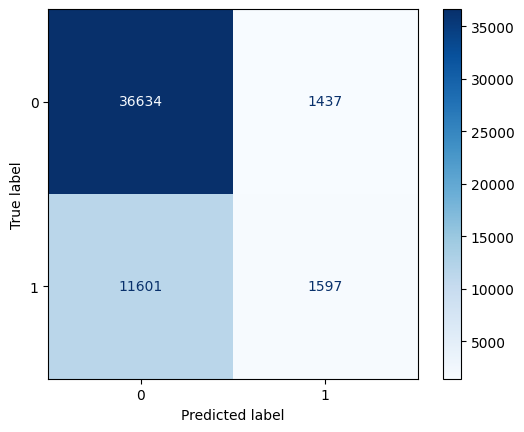

In [16]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 모델 초기화
Total_model = xgb.XGBClassifier(
    n_estimators=2779,  # 트리의 개수 (부스팅 반복 횟수)
    learning_rate=0.008864633411108202,  # 학습률 (0과 1 사이의 값)
    max_depth=4,  # 트리의 최대 깊이
    min_child_weight=0.006494427230531438,  # 최소 자식 가중치
    gamma=1.6682946942701627e-05,  # 감마 (노드 분할에 필요한 최소 손실 감소)
    reg_alpha=0.91386214962831,  # L1 정규화 (Lasso) 계수
    reg_lambda=0.6093389417370965,  # L2 정규화 (Ridge) 계수
    colsample_bytree=0.8753058213498945,  # 각 트리를 학습할 때 사용하는 피처 샘플링 비율
    subsample=0.7097325041124595,  # 각 트리를 학습할 때 사용하는 데이터 샘플링 비율

    objective='binary:logistic',  # 손실 함수 (이진 분류인 경우 'binary:logistic' 사용)
    tree_method='hist',  # 트리를 구성할 때 사용할 알고리즘
    eval_metric='auc',  # 모델 성능 평가 지표
    random_state=42,  # 랜덤 시드 값 (재현성을 위해 설정)
    verbosity=0  # 학습 과정의 출력을 제어 (0이면 출력을 억제)
)

# 모델 학습
Total_model.fit(Total_X_train, Total_y_train)

# 예측
y_pred = Total_model.predict(Total_X_test)
y_pred_proba = Total_model.predict_proba(Total_X_test)[:, 1]

# 평가
accuracy = accuracy_score(Total_y_test, y_pred)
f1 = f1_score(Total_y_test, y_pred)
auc = roc_auc_score(Total_y_test, y_pred_proba)
cm = confusion_matrix(Total_y_test, y_pred)

# 결과 출력
print()
print("--- Model Performance ---")
print(f"Model Accuracy: {accuracy}")
print(f"Model F1 Score: {f1}")
print(f"Model AUC: {auc}")

# 혼동 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Total_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

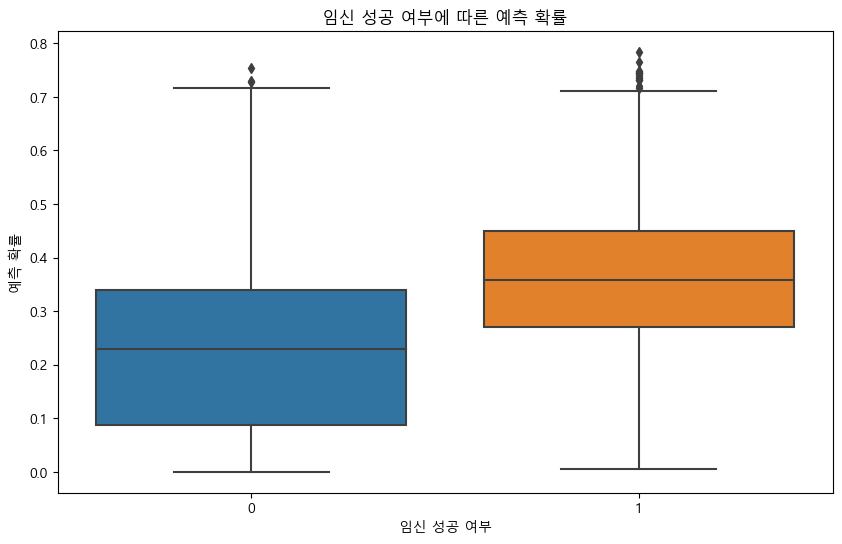

In [19]:
import platform
from matplotlib import rc

# 운영 체제에 따라 폰트 설정
if platform.system() == 'Windows':  # Windows 환경
    rc('font', family='Malgun Gothic')  # 맑은 고딕

# 음수 표시 가능하도록 설정
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

# y_pred_proba를 임신_성공_여부에 따라 박스플롯으로 출력
result_df = pd.DataFrame({'임신_성공_여부': Total_y_test, '예측_확률': y_pred_proba})

# 박스플롯 출력
plt.figure(figsize=(10, 6))
sns.boxplot(x='임신_성공_여부', y='예측_확률', data=result_df)
plt.title('임신 성공 여부에 따른 예측 확률')
plt.xlabel('임신 성공 여부')
plt.ylabel('예측 확률')
plt.show()

데이콘 PUBLIC 0.7409264553

## 제출

In [17]:
# 모델 학습 및 예측
Total_model.fit(Total_X, Total_y)
Total_pred_proba = Total_model.predict_proba(Total_test.drop('ID', axis=1))[:, 1]
Total_test['probability'] = Total_pred_proba

# 최종 제출 파일 생성
submission = Total_test[['ID', 'probability']]
submission = submission.sort_values(by='ID')

In [18]:
# 제출 파일 저장
submission.to_csv('../submission/code32_all_xgb.csv', index=False, encoding='utf-8')

----

.